# Multi-panel plots with matplotlib

In [1]:
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

ion()

## Figures and axes in matplotlib

In Matplotlib (mpl), a **figure** may be comprised of multiple **axes**.  An axes set defines a coordinate system spanning a rectangular subregion of the figure. Typically this is a 2-D cartesian $(x,y)$ set, but circular and other types of axes are available (circular axes are associated with a rectangular region enclosing them).  Note that in mpl parlance, "axes," although plural, refers to a *single* plot element, e.g., an $x$-axis/$y$-axis pair.  I tend to use the term "axes set," so I can refer to the corresponding plot element as grammatically singular, but this isn't common in the mpl documentation.

Mpl has two approaches for defining rectangular regions in a figure, and associating axes with such regions: the **subplot** and **gridspec** approaches, described further below.

Most commonly, each axes set in a figure controls a unique rectangular region. But a single region can sometimes have multiple axes associated with it. For example, you may want a plot to include two curves that have a common $x$ axis but different $y$ axes (perhaps one labeled on the left $y$ axis, and the other labeled on the right $y$ axis).  Here's an example: [two_scales.py — Matplotlib documentation](https://matplotlib.org/examples/api/two_scales.html). Here we'll treat only cases where each figure region has one axes set.

Mpl keeps track of a **current figure** and **current axes**.  When you create a new figure (perhaps implicitly, e.g., the first time you call `plot`), mpl makes it the current figure; the current figure only changes if you create a new figure or explicitly change the current figure setting. Similarly, when you create a new axes set (perhaps implicitly, e.g., by first calling `plot` or `subplot`), mpl makes it the current axes set. Creating a new subplot will change the current axes to point to the new subplot.

Matplotlib (mpl) has two different APIs (Application Programming Interfaces) for producing plots:

* A **function-based (procedural) interface**, where the user calls *functions* that act on the *current* figure, or its *current* axes. This interface is mainly defined in the `pyplot` module, and is meant to mimic MATLAB's plotting interface; it's also called the **`pyplot` interface**.  [Pyplot tutorial — Matplotlib documentation](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) provides a tutorial on the function-based interface.
* An **object-oriented (OO) interface**, where the user calls *methods* on figure or axes objects.  It is also called the **Matplotlib API**. The [Matplotlib API gallery](https://matplotlib.org/gallery/index.html#api-examples) provides examples using this interface.

The OO interface is the most fundamental and flexible interface; the function-based interface is a simpler interface written on top of the OO interface.

Since the function-based interface applies only to the *current* figure or axes, mpl provides functions that support changing the current figure or axes. These functions are also helpful for moving back and forth between function-based and OO interfaces. Basic use of these functions is as follows (note that these functions have signatures with optional arguments providing additional capability): 

* `figure(num=i)`: Set the current figure to the `i`'th created figure (for integer `i`); `i=1` for the first created figure.
* `gcf()`: "Get Current Figure" — Return a reference to the current figure object; if you set `fig = gcf()`, then `f.number` will be the number for the current figure.
* `get_fignums()`: Return a list of numbers for available figures.
* `gca()`: "Get Current Axes" — Return a a reference to the current axes object in the current figure (create an axes object first if one doesn't exist). Save the reference to a variable so you can plot on the current axes set later, after switching to another axes set: `ax = gca()`. 
* `sca(ax)`: "Set Current Axes" — Set the current axes to `ax` (an axes instance).

The function-based interface is convenient for producing simple figures, e.g., with a single axes set, or a small number of axes on a simple subplot grid. The OO interface can be a bit wordy if you are plotting a single figure, but it's more convenient than the function-based interface for complex figures. If you find yourself using `gca` and `sca` more than once or twice, it's probably worth switching to the OO interface for the figure you're working on.



### Simple function-based plots

In [2]:
# Collect (x,y) values for plotting a standard normal PDF.
xvals = linspace(-4, 4, 200)
std_norm = stats.norm()
yvals = std_norm.pdf(xvals)

Fig. nums: [1]


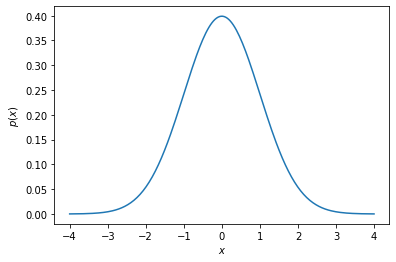

In [3]:
plot(xvals, yvals, '-')
xlabel('$x$')
ylabel('$p(x)$')

# Show a list with the number of the figure associated with this cell.
print('Fig. nums:', get_fignums())

In [4]:
# Note that ion() puts figures in the notebook, each associated with
# the cell that created it.  The figure is completed once it's
# plotted and is thus not accessible later.  If we produced this
# figure in a script (i.e., a ".py" file run with IPython), the
# figure would remain accessible.  But in the notebook, it's no
# longer accessible.
print('Fig. nums:', get_fignums())

Fig. nums: []


Fig. nums: [1, 2]


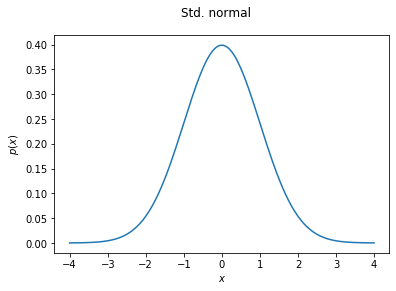

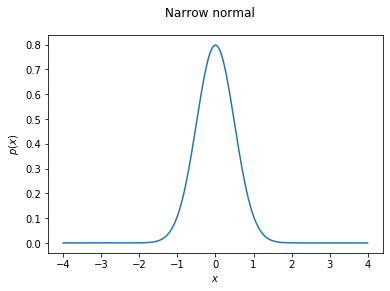

In [5]:
# Here we plot two different figures in a single cell.

# Gather data for second, narrow normal.
narrow_norm = stats.norm(scale=0.5)
yvals2 = narrow_norm.pdf(xvals)
f1 = figure()
f2 = figure()

figure(num=1)
suptitle('Std. normal')  # centered fig title
plot(xvals, yvals, '-')
xlabel('$x$')
ylabel('$p(x)$')

figure(num=2)
suptitle('Narrow normal')  # centered fig title
plot(xvals, yvals2, '-')
xlabel('$x$')
ylabel('$p(x)$')

print('Fig. nums:', get_fignums())

### A simple plot with the OO interface

Here we duplicate the first figure above, using the OO interface. It's very similar, except that we need to refer to the axes explicitly, and some methods have `set_` or `get_` preceding the name of the corresponding `pyplot` function (use the docs, or introspection on an `axes` instance, to determine if the `pyplot` counterpart has a prepended `set_` or `get_`).

Text(0, 0.5, '$p(x)$')

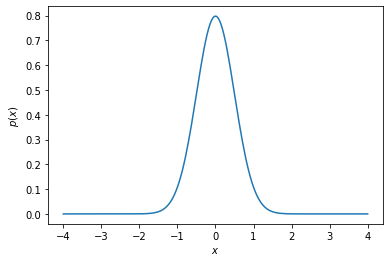

In [6]:
fig = figure()

# The simplest way to add a single axes set to a figure is by
# creating a subplot occupying the whole figure.
ax = fig.add_subplot(111)  # "111" abbreviates "1st region in a 1x1 grid of regions"

ax.plot(xvals, yvals2, '-')

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

## The subplot framework

The subplot framework enables easy creation of multi-panel figures, with equal-sized panels on a rectangular grid (it can be used for more complicated panel geometries, but it's awkward for that).

The subplot commands divide the figure area into a specified number of rows and columns, say, $n\times m$. A panel may be accessed by its panel number, found by counting along rows (starting with "1").  A subplot specification is a 3-tuple, `(nr, nc, num)`, which points to panel number `num` in a grid with `nr` rows and `nc` columns.  For example:
* (1,1,1):  The only axes in a single-axes figure.
* (1,2,2):  The rightmost axes in a figure with one row of two regions, arranged horizontally.
* (2,1,2):  The bottom axes in a figure with two rows and one column of regions, arranged vertically.
* (2,3,5):  The middle axes in a figure with six panels, in two rows of three panels

Subplot commands typically support **abbreviated arguments**; if a single 3-digit argument is provided, the digits are interpreted as `nr, nc, num`, defined above.  So subplot `235` is the same a subplot `(2,3,5)`.

The pyplot interface has a `subplot()` function for creating new subplots or accessing previously created subplots.  The OO interface handles this via the `fig.add_subplot()` method of a figure instance.

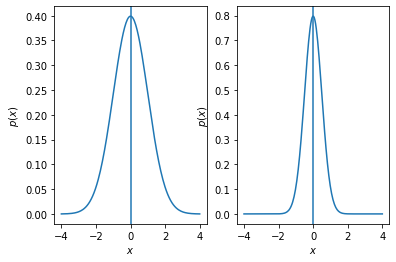

In [7]:
# A 2-subplot example using pyplot:

# This first call creats a figure, and creates an axes set
# in the left half.
subplot(121)

plot(xvals, yvals, '-')
xlabel('$x$')
ylabel('$p(x)$')

lax = gca()  # save current axes for later use

subplot(122)
plot(xvals, yvals2, '-')
xlabel('$x$')
ylabel('$p(x)$')
axvline(0)

# Go back to left axes to add vline.
sca(lax)
axvline(0)

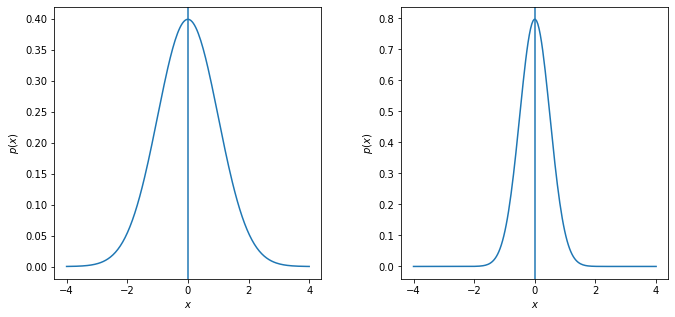

In [8]:
# Repeat that, fixing dimensions to make it look nicer.

# Control figure dimensions with figsize.
figure(figsize=(11,5))  # width, height (would be inches in a saved figure)

# Adjust the between-panel width, as frxn of avg axes width.
# For the OO interface, use the .subplots_adjust() method of a fig.
subplots_adjust(wspace=0.3)

subplot(121)
plot(xvals, yvals, '-')
xlabel('$x$')
ylabel('$p(x)$')
axvline(0)

subplot(122)
plot(xvals, yvals2, '-')
xlabel('$x$')
ylabel('$p(x)$')
axvline(0)

## The gridspec framework

The gridspec framework supports more flexible grid-based axes layouts. It's especially useful for multi-panel plots composed of panels with different sizes.  It relies on the same *rows* $\times$ *columns* description that the subplot framework uses, but it lets the user specify **regions that span multiple rows or columns**. We'll look at the main features here; see [Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html) for more complete documentation.

One major difference between the approaches is that **gridspec uses 0-based counting**, like Python sequences or NumPy arrays.

Gridspec supports two ways to specify the region for an axes set:
* **Tuples+span in subplot2grid:** Specify the grid with a `(nr, nc)` tuple, a starting panel location with a `(row, col)` tuple, and (optional) row or column spans with `rowspan` or `colspan` keyword arguments.
* **`GridSpec` instance:** Create an array-like `GridSpec` instance with `(nr, nc)` tuple, and use the instance to specify an axes region with slice syntax.

To adjust panel dimensions, in place of `subplots_adjust`, use the `.update()` method of a `GridSpec` object.

Simple examples follow.

In [9]:
# Don't forget this import!!!
import matplotlib.gridspec as gridspec

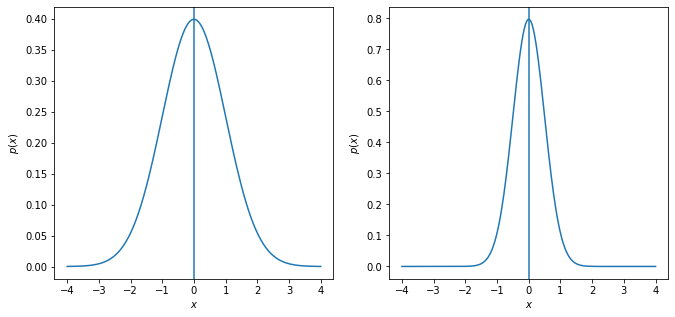

In [10]:
# This just duplicates what you can do more simply
# using subplot(121) and subplot(122)

figure(figsize=(11,5))

# Equivalent to subplot(121)
subplot2grid((1,2), (0, 0))  # on a 1x2 grid, use panel (0,0)
plot(xvals, yvals, '-')
xlabel('$x$')
ylabel('$p(x)$')
axvline(0)

# Equivalent to subplot(122)
subplot2grid((1,2), (0, 1))  # on a 1x2 grid, use panel (0,1)
plot(xvals, yvals2, '-')
xlabel('$x$')
ylabel('$p(x)$')
axvline(0)

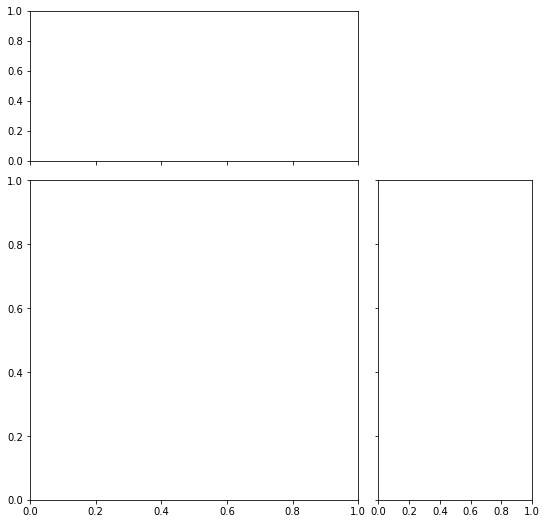

In [11]:
# Here is a layout that would be useful for showing a joint PDF
# (lower left) with marginals above and to the right.

fig = figure(figsize=(9,9))

# Base the layout on a 6x6 grid.
gs = gridspec.GridSpec(6, 6)

# Show the joint in a large square on the bottom left, four
# cells wide and tall.
# Note that the counting is from top left to bottom right.
joint_ax = subplot(gs[2:,0:4])  # occupies rows 2-5, cols 0-3

# x marginal pane occupies rows 0-1, cols 0-3, and it
# shares an x axis scale with the joint axes.
xmarg_ax = subplot(gs[:2,0:4], sharex=joint_ax)  
setp(xmarg_ax.get_xticklabels(), visible=False)  # hide x labels on top axes

# y marginal pane occupies occupies rows 2-5, cols 4-5, and it
# shares a y axis scale with the joint axes.
ymarg_ax = subplot(gs[2:,4:], sharey=joint_ax)
setp(ymarg_ax.get_yticklabels(), visible=False)  # hide y labels on right axes

# Adjust between-panel space; other attrs can change origin, margins.
gs.update(wspace=0.3, hspace=0.3)

The gridspec approach also supports grids with **unequal grid spacing**, which can make layouts like the previous one a bit simpler.

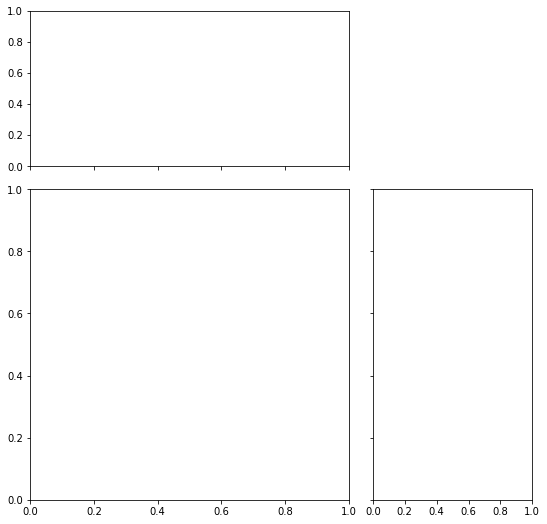

In [12]:
fig = figure(figsize=(9,9))

# A 2x2 grid, but with narrow top row and right column:
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[2, 1],  # only *relative* values matter
                       height_ratios=[1, 2]
                       )

joint_ax = subplot(gs[1,0])  # occupies just one cell

xmarg_ax = subplot(gs[0,0], sharex=joint_ax)  # occupies just one cell
setp(xmarg_ax.get_xticklabels(), visible=False)  # hide x labels on top axes

ymarg_ax = subplot(gs[1,1], sharey=joint_ax)  # occupies just one cell
setp(ymarg_ax.get_yticklabels(), visible=False)  # hide y labels on right axes

# Adjust between-panel space; other attrs can change origin, margins.
gs.update(wspace=0.1, hspace=0.1)